In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


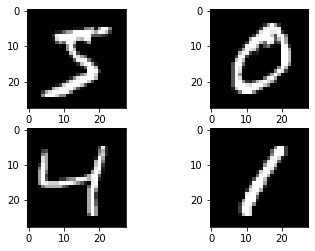

In [4]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

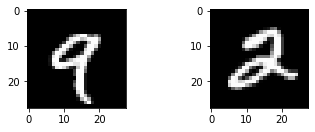

In [5]:
plt.subplot(221)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))

In [6]:
# Flatten the 28x28 images into a 784 vector for each image

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [7]:
# Normalize inputs from values of 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

In [8]:
# One-hot encode label values from integer to categorical

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_classes

10

In [9]:
# KNearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
knn_predicted = knn.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

expected = y_test.tolist()

print('Accuracy: ', accuracy_score(expected, knn_predicted))

Accuracy:  0.966


In [12]:
from sklearn.metrics import confusion_matrix

# argmax() used to remove one-hot encoding
cm = confusion_matrix(y_test.argmax(axis=1), knn_predicted.argmax(axis=1))
cm

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   2, 1131,    2,    0,    0,    0,    0,    0,    0,    0],
       [  18,    7,  987,    2,    0,    0,    1,   14,    3,    0],
       [   9,    2,    2,  971,    1,   12,    1,    6,    3,    3],
       [   8,    6,    0,    0,  942,    0,    4,    1,    0,   21],
       [  18,    0,    0,    7,    2,  854,    4,    1,    2,    4],
       [   6,    3,    0,    0,    3,    1,  945,    0,    0,    0],
       [   5,   20,    4,    0,    2,    0,    0,  986,    0,   11],
       [  26,    1,    3,   11,    4,    8,    4,    4,  909,    4],
       [  16,    4,    2,    5,    7,    1,    1,    9,    2,  962]])

<AxesSubplot:>

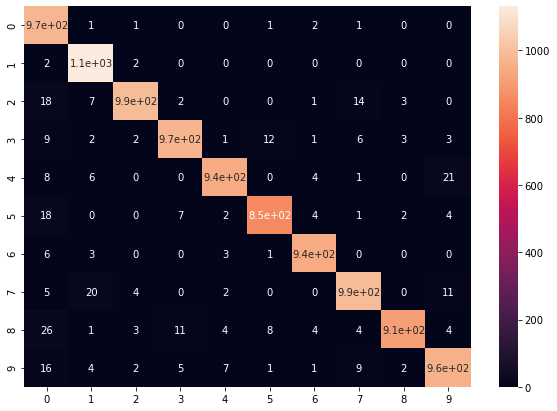

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np

cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], knn_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

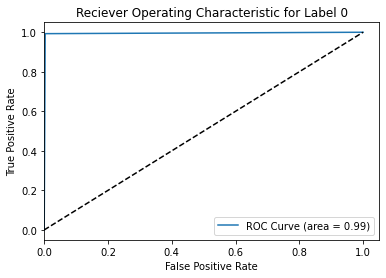

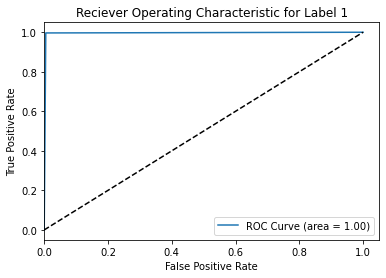

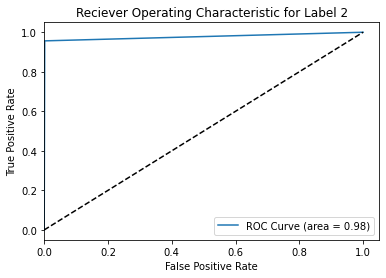

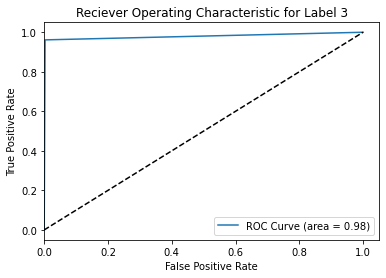

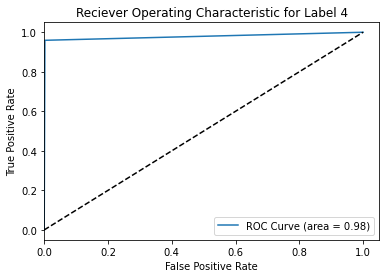

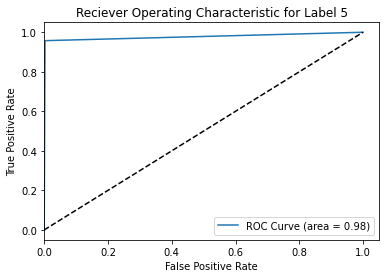

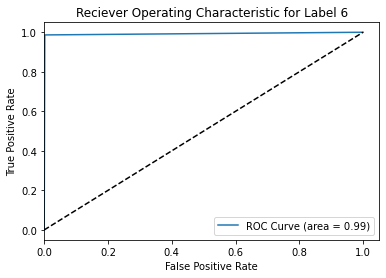

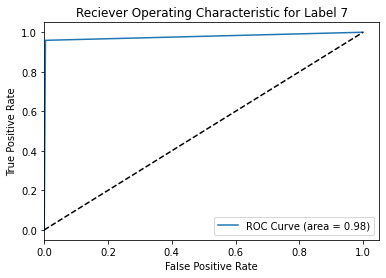

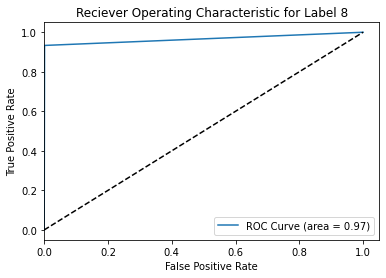

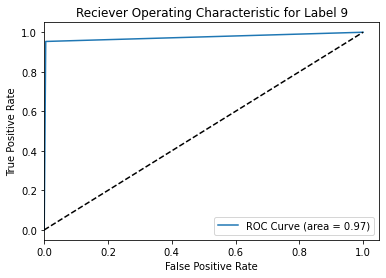

In [15]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [16]:
macro_roc_auc_ovo = roc_auc_score(y_test, knn_predicted, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, knn_predicted, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, knn_predicted, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, knn_predicted, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.981361 (macro), 
0.981538 (weighted)

One-vs-Rest ROC AUC scores:
0.981361 (macro), 
0.981538 (weighted)


In [139]:
# KNN with K = 10

knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [140]:
knn10_predicted = knn_10.predict(X_test)

expected = y_test.tolist()

print('Accuracy: ', accuracy_score(expected, knn10_predicted))

Accuracy:  0.9558


In [141]:
cm = confusion_matrix(y_test.argmax(axis=1), predicted.argmax(axis=1))
cm

array([[ 972,    1,    2,    0,    1,    0,    0,    1,    2,    1],
       [   0, 1120,    6,    1,    0,    1,    2,    1,    4,    0],
       [   3,    0, 1014,    2,    2,    0,    1,    5,    4,    1],
       [   0,    0,    2,  996,    0,    2,    0,    3,    3,    4],
       [   0,    0,    4,    1,  970,    0,    2,    1,    1,    3],
       [   2,    0,    0,    5,    1,  878,    1,    2,    2,    1],
       [   5,    2,    1,    1,    5,    3,  939,    1,    1,    0],
       [   0,    0,   10,    1,    1,    0,    0, 1011,    2,    3],
       [   1,    0,    3,    8,    6,    3,    2,    4,  944,    3],
       [   3,    2,    0,    4,    9,    3,    0,    7,    4,  977]],
      dtype=int64)

<AxesSubplot:>

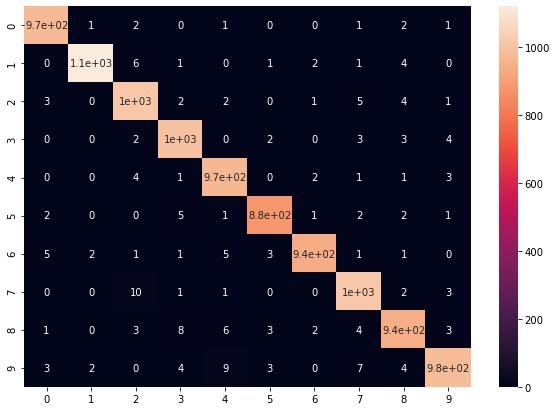

In [142]:
cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [143]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [144]:
forest_predicted = random_forest.predict(X_test)
print('Accuracy: ', accuracy_score(expected, forest_predicted))

Accuracy:  0.9014


In [145]:
cm = confusion_matrix(y_test.argmax(axis=1), forest_predicted.argmax(axis=1))
cm

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [  24, 1110,    0,    0,    0,    0,    1,    0,    0,    0],
       [ 103,    0,  921,    0,    0,    0,    1,    6,    1,    0],
       [ 127,    0,    2,  876,    0,    1,    0,    3,    1,    0],
       [ 101,    0,    0,    0,  872,    0,    1,    0,    1,    7],
       [ 124,    0,    0,    5,    0,  761,    1,    0,    1,    0],
       [  66,    2,    0,    0,    1,    0,  889,    0,    0,    0],
       [  82,    0,    8,    0,    0,    0,    0,  935,    0,    3],
       [ 157,    0,    0,    0,    1,    0,    0,    0,  814,    2],
       [ 121,    0,    0,    0,    2,    0,    0,    1,    0,  885]],
      dtype=int64)

<AxesSubplot:>

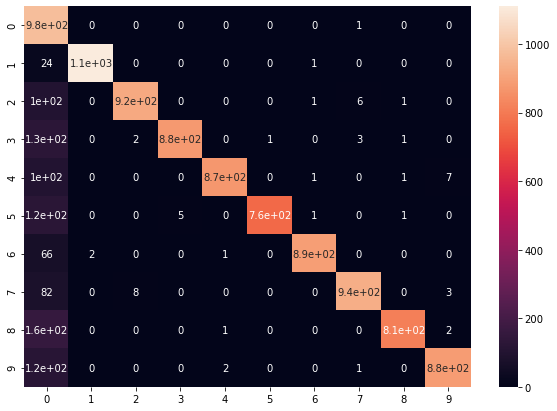

In [146]:
cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [179]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], forest_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

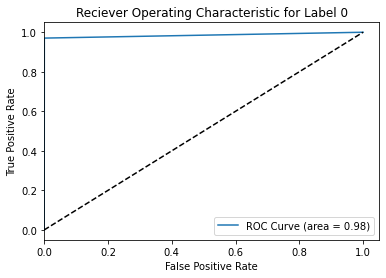

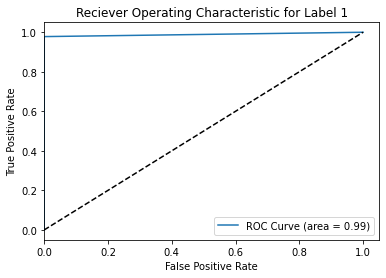

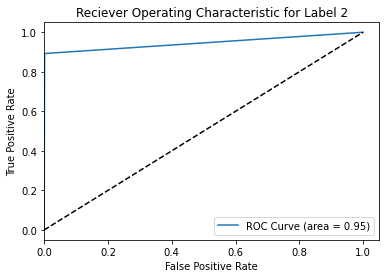

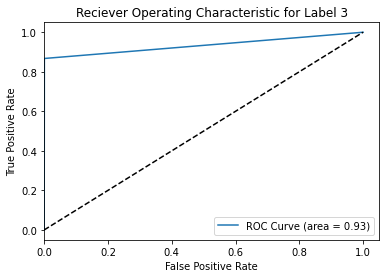

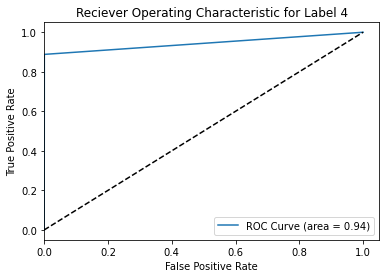

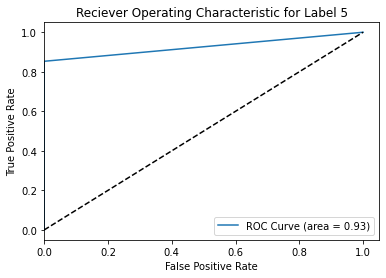

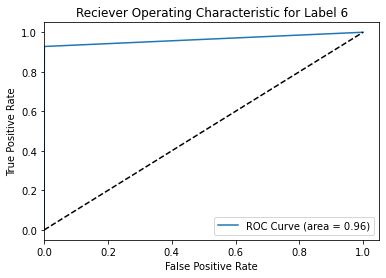

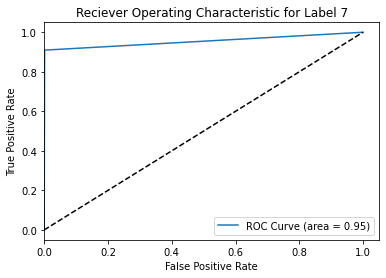

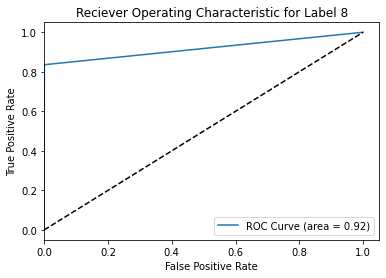

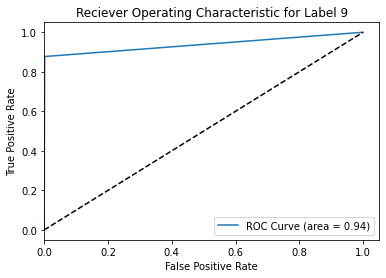

In [180]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [191]:
macro_roc_auc_ovo = roc_auc_score(y_test, forest_predicted, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, forest_predicted, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, forest_predicted, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, forest_predicted, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.949664 (macro), 
0.950380 (weighted)

One-vs-Rest ROC AUC scores:
0.949664 (macro), 
0.950380 (weighted)


In [147]:
# Linear SVM (due to time consumption of using SVM with large dataset)

from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=10000)
linear_svm.fit(X_train, y_train.argmax(axis=1))

LinearSVC(max_iter=10000)

In [148]:
linsvm_predicted = linear_svm.predict(X_test)
print('Accuracy: ', accuracy_score(np.argmax(expected, axis=1), linsvm_predicted))

Accuracy:  0.9183


In [149]:
cm = confusion_matrix(y_test.argmax(axis=1), linsvm_predicted)
cm

array([[ 962,    0,    2,    1,    1,    4,    5,    3,    1,    1],
       [   0, 1112,    3,    2,    0,    1,    5,    1,   11,    0],
       [  11,   11,  914,   18,   10,    4,   13,   12,   36,    3],
       [   4,    0,   19,  918,    2,   22,    5,   12,   20,    8],
       [   1,    4,    5,    4,  913,    0,    9,    3,    5,   38],
       [   9,    2,    0,   39,   12,  768,   18,    7,   29,    8],
       [   7,    4,    7,    2,    5,   21,  909,    1,    2,    0],
       [   2,    8,   23,    5,    7,    1,    1,  948,    4,   29],
       [  11,   13,    8,   21,   14,   31,    8,   13,  843,   12],
       [   7,    8,    2,   15,   31,   12,    0,   26,   12,  896]],
      dtype=int64)

<AxesSubplot:>

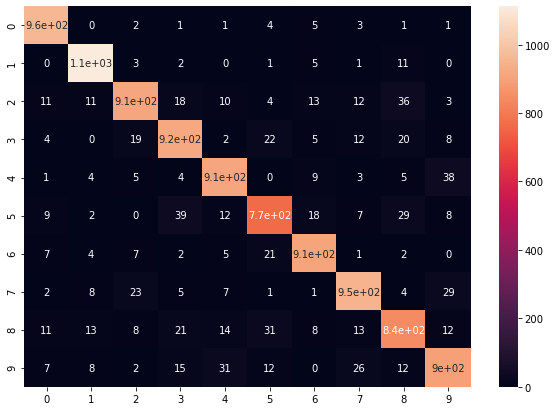

In [150]:
cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [177]:
fpr = dict()
tpr = dict()
roc_auc = dict()

# One-Hot Encode predicted values
linsvm_predicted_ohe = np_utils.to_categorical(linsvm_predicted)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], linsvm_predicted_ohe[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

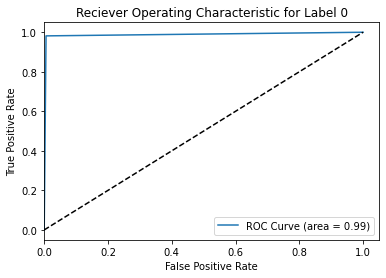

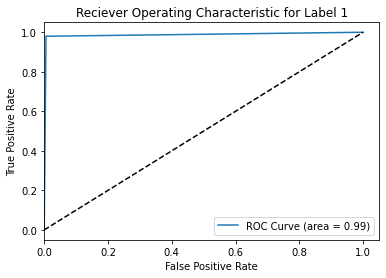

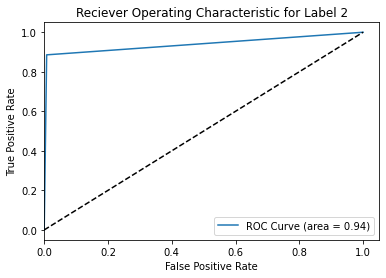

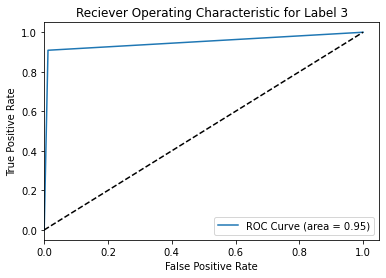

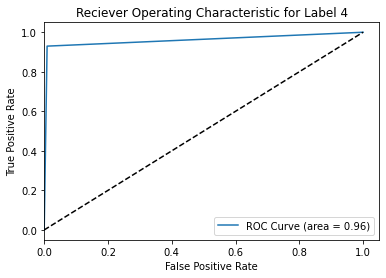

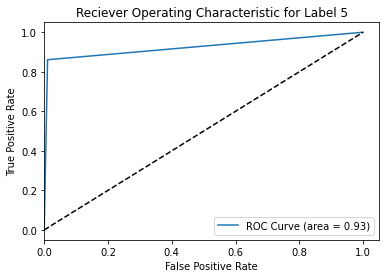

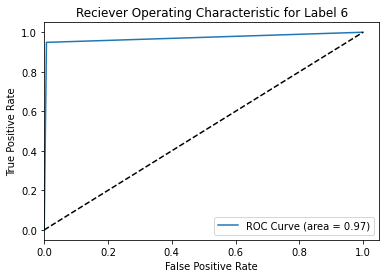

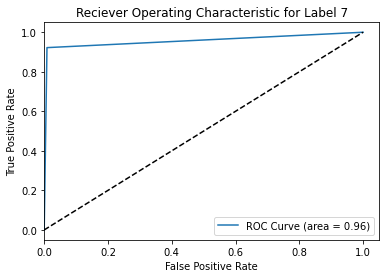

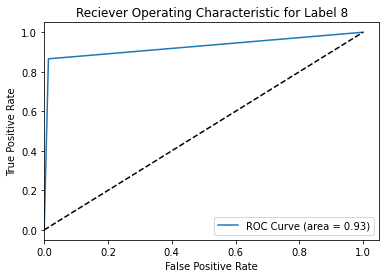

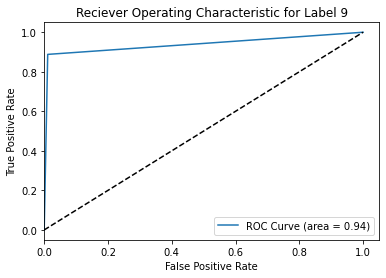

In [178]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [193]:
macro_roc_auc_ovo = roc_auc_score(y_test, linsvm_predicted_ohe, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, linsvm_predicted_ohe, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, linsvm_predicted_ohe, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, linsvm_predicted_ohe, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.954024 (macro), 
0.954644 (weighted)

One-vs-Rest ROC AUC scores:
0.954024 (macro), 
0.954644 (weighted)


In [151]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.argmax(axis=1))

LogisticRegression(max_iter=1000)

In [152]:
logreg_predicted = logreg.predict(X_test)
print('Accuracy: ', accuracy_score(np.argmax(expected, axis=1), logreg_predicted))

Accuracy:  0.9256


<AxesSubplot:>

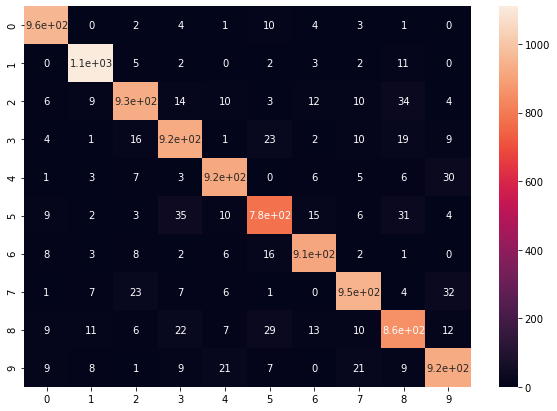

In [153]:
cm = confusion_matrix(y_test.argmax(axis=1), logreg_predicted)
cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [167]:
fpr = dict()
tpr = dict()
roc_auc = dict()

# One-Hot Encode predicted values
logreg_predicted_ohe = np_utils.to_categorical(logreg_predicted)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], logreg_predicted_ohe[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

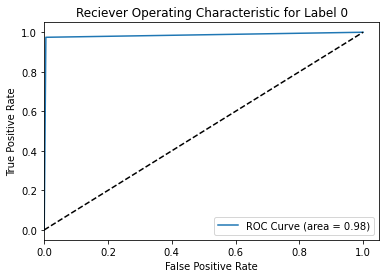

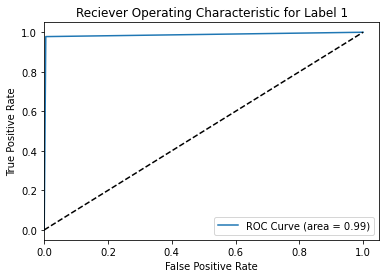

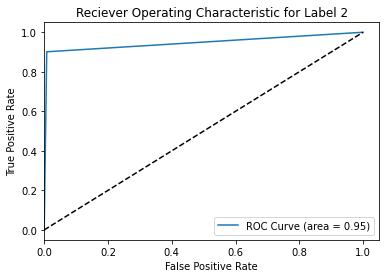

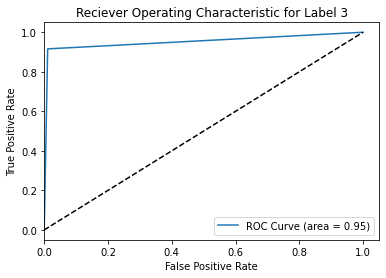

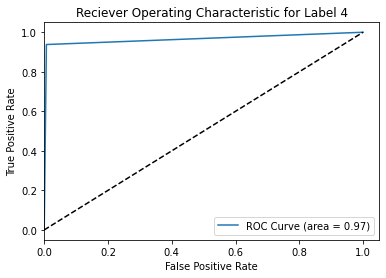

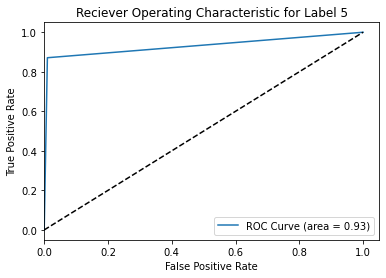

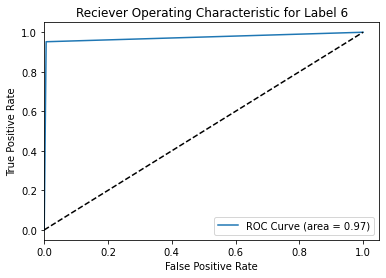

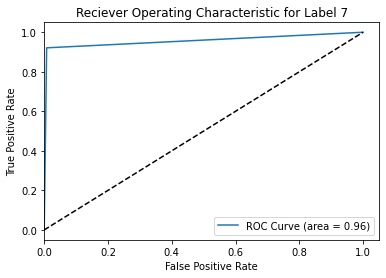

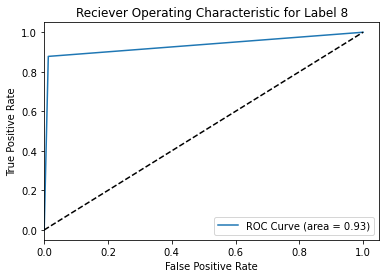

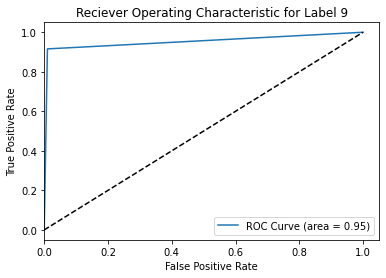

In [169]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [194]:
macro_roc_auc_ovo = roc_auc_score(y_test, logreg_predicted_ohe, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, logreg_predicted_ohe, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, logreg_predicted_ohe, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, logreg_predicted_ohe, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.958130 (macro), 
0.958698 (weighted)

One-vs-Rest ROC AUC scores:
0.958130 (macro), 
0.958698 (weighted)


In [18]:
# Simple Neural Network

from keras.models import Sequential
from keras.layers import Dense

def simple_nn():
    model = Sequential()
    
    # Single hidden layer with neurons equivalent to number of pixels input
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    
    # Output Layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
model = simple_nn()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: ', accuracy[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2804 - accuracy: 0.9196 - val_loss: 0.1369 - val_accuracy: 0.9596
Epoch 2/10
 - 4s - loss: 0.1114 - accuracy: 0.9682 - val_loss: 0.0920 - val_accuracy: 0.9735
Epoch 3/10
 - 4s - loss: 0.0715 - accuracy: 0.9796 - val_loss: 0.0846 - val_accuracy: 0.9739
Epoch 4/10
 - 4s - loss: 0.0493 - accuracy: 0.9860 - val_loss: 0.0758 - val_accuracy: 0.9761
Epoch 5/10
 - 4s - loss: 0.0360 - accuracy: 0.9899 - val_loss: 0.0654 - val_accuracy: 0.9801
Epoch 6/10
 - 4s - loss: 0.0268 - accuracy: 0.9926 - val_loss: 0.0634 - val_accuracy: 0.9798
Epoch 7/10
 - 5s - loss: 0.0208 - accuracy: 0.9947 - val_loss: 0.0565 - val_accuracy: 0.9835
Epoch 8/10
 - 4s - loss: 0.0140 - accuracy: 0.9972 - val_loss: 0.0599 - val_accuracy: 0.9810
Epoch 9/10
 - 4s - loss: 0.0096 - accuracy: 0.9984 - val_loss: 0.0575 - val_accuracy: 0.9826
Epoch 10/10
 - 4s - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.0613 - val_accuracy: 0.9819
Accuracy:  0.981899

In [20]:
nn_predicted = model.predict(X_test, batch_size=200, verbose=2)
print('Accuracy: ', accuracy_score(np.argmax(expected, axis=1), np.argmax(nn_predicted, axis=1)))

Accuracy:  0.9819


<AxesSubplot:>

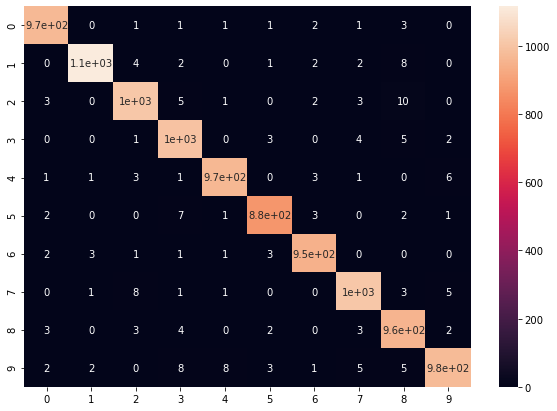

In [21]:
cm = confusion_matrix(y_test.argmax(axis=1), np.argmax(nn_predicted, axis=1))
cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [22]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], nn_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

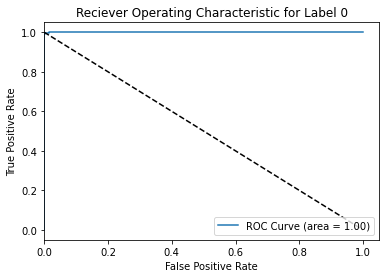

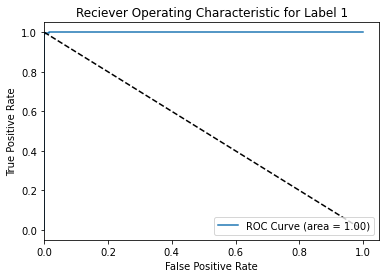

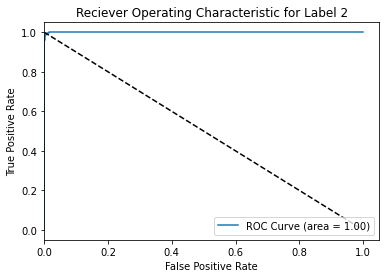

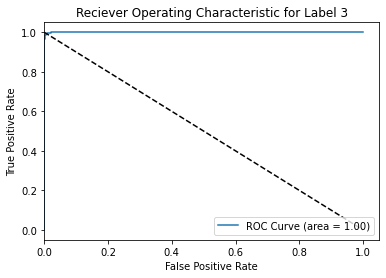

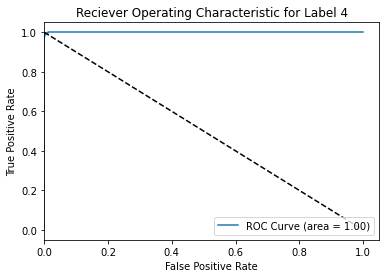

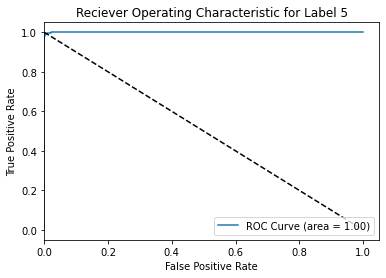

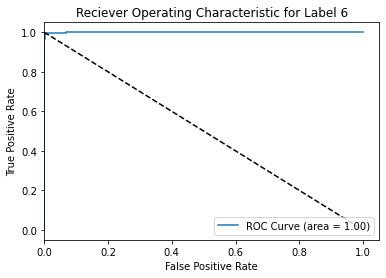

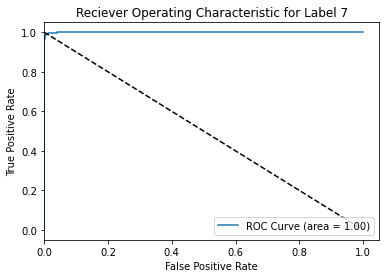

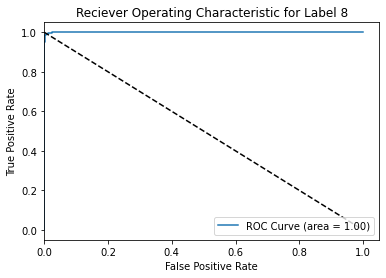

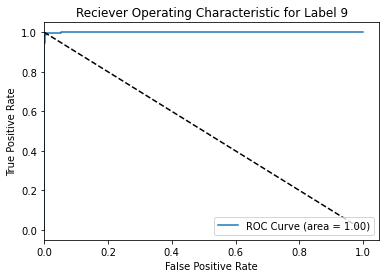

In [23]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [24]:
macro_roc_auc_ovo = roc_auc_score(y_test, nn_predicted, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, nn_predicted, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, nn_predicted, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, nn_predicted, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.999750 (macro), 
0.999750 (weighted)

One-vs-Rest ROC AUC scores:
0.999750 (macro), 
0.999750 (weighted)


<function matplotlib.pyplot.show(close=None, block=None)>

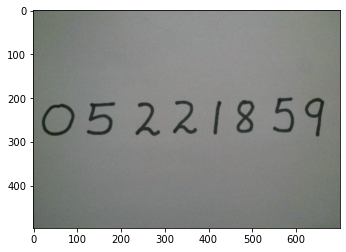

In [25]:
import cv2

image = cv2.imread('number_test.jpg')
plt.imshow(image, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

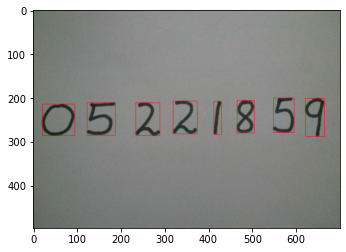

In [26]:
image = cv2.imread('number_test.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Create rectangle around each digit in image to display
    cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing digit to 18x18 to be centered in 28x28 in image
    resized_digit = cv2.resize(digit, (18,18))
    
    # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
    # Appending final preprocessed digit to list
    preprocessed_digits.append(padded_digit)
    
plt.imshow(image, cmap='gray')
plt.show

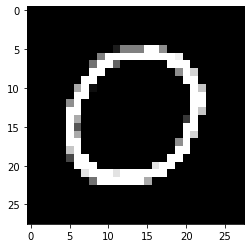

In [27]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show()

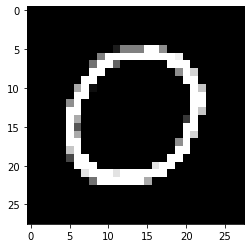

In [28]:
plt.imshow(preprocessed_digits[0].reshape(28, 28), cmap='gray')
plt.show()

In [29]:
(X_train_img, _), (X_test_img, _) = mnist.load_data()

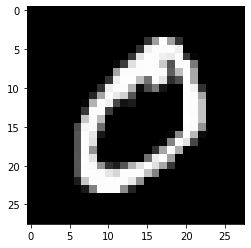

In [30]:
plt.imshow(X_train_img[1], cmap='gray')
plt.show()

In [31]:
preprocessed_digits

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 128,
         128, 128, 255, 255, 142,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [32]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
X_test_img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [34]:
shaped_digits = np.array(preprocessed_digits)

In [35]:
shaped_digits = shaped_digits.reshape((shaped_digits.shape[0], num_pixels)).astype('float32')
shaped_digits /= 255

In [39]:
nn_hand_prediction = model.predict(shaped_digits, batch_size=200, verbose = 2)
nn_hand_prediction.argmax(axis=1)

array([0, 2, 5, 8, 2, 8, 7, 5])

Prediction: 0


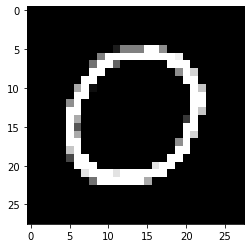

In [40]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[0]))

Prediction: 2


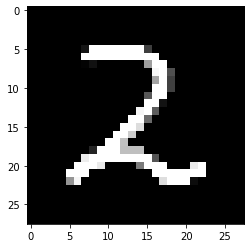

In [41]:
plt.imshow(preprocessed_digits[1], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[1]))

Prediction: 5


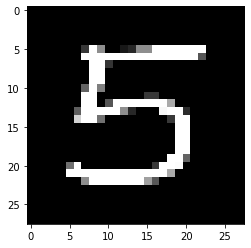

In [42]:
plt.imshow(preprocessed_digits[2], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[2]))

Prediction: 8


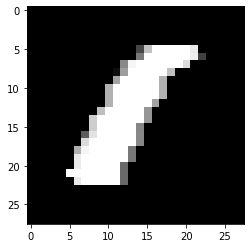

In [43]:
plt.imshow(preprocessed_digits[3], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[3]))

Prediction: 2


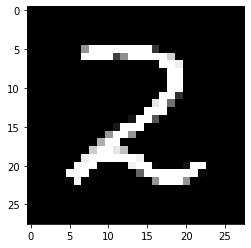

In [44]:
plt.imshow(preprocessed_digits[4], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[4]))

Prediction: 8


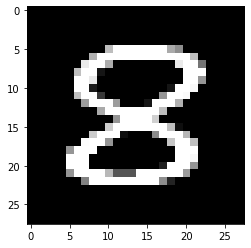

In [45]:
plt.imshow(preprocessed_digits[5], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[5]))

Prediction: 7


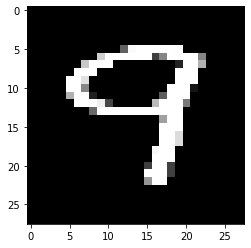

In [46]:
plt.imshow(preprocessed_digits[6], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[6]))

Prediction: 5


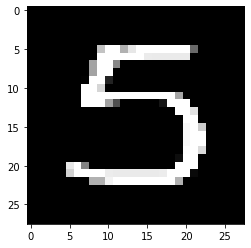

In [47]:
plt.imshow(preprocessed_digits[7], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[7]))

<function matplotlib.pyplot.show(close=None, block=None)>

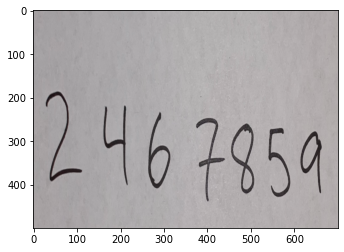

In [48]:
image = cv2.imread('number_test3.jpg')
image = cv2.resize(image, (700, 500))
plt.imshow(image, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

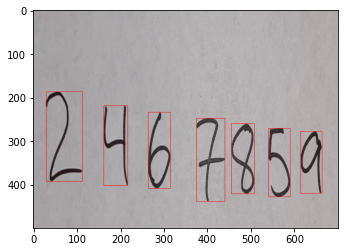

In [49]:
# Image taken on white paper

image = cv2.imread('number_test3.jpg')
image = cv2.resize(image, (700, 500))
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Check size of digit to attempt to keep extraneous markings out of data
    if(digit.size > 325):
        # Create rectangle around each digit in image to display
        cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
        # Resizing digit to 18x18 to be centered in 28x28 in image
        resized_digit = cv2.resize(digit, (18,18))
    
        # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
        # Appending final preprocessed digit to list
        preprocessed_digits.append(padded_digit)
    
plt.imshow(image, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

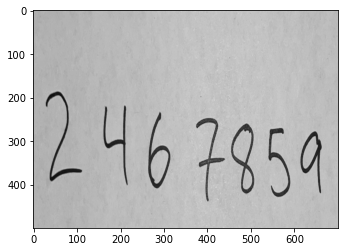

In [50]:
plt.imshow(grey, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

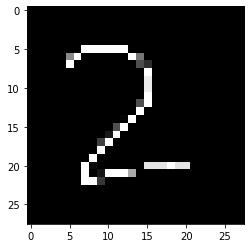

In [51]:
plt.imshow(preprocessed_digits[6],cmap='gray')
plt.show

In [52]:
len(preprocessed_digits)

7

In [53]:
shaped_digits = np.array(preprocessed_digits)
shaped_digits = shaped_digits.reshape(shaped_digits.shape[0], num_pixels).astype('float32')
shaped_digits /= 255

In [54]:
#shaped_digits
self_prediction = model.predict(shaped_digits)
self_prediction.argmax(axis=1)

array([9, 5, 8, 7, 6, 4, 2])

Prediction: 9


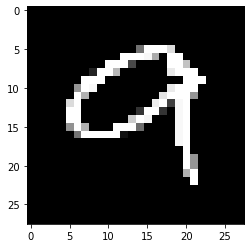

In [55]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[0]))

Prediction: 5


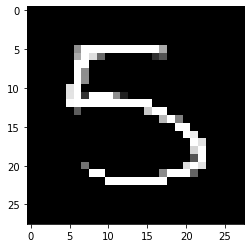

In [56]:
plt.imshow(preprocessed_digits[1], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[1]))

Prediction: 8


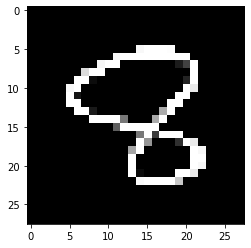

In [57]:
plt.imshow(preprocessed_digits[2], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[2]))

Prediction: 7


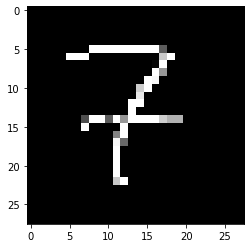

In [58]:
plt.imshow(preprocessed_digits[3], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[3]))

Prediction: 6


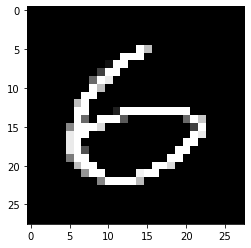

In [59]:
plt.imshow(preprocessed_digits[4], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[4]))

Prediction: 4


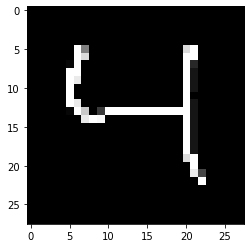

In [60]:
plt.imshow(preprocessed_digits[5], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[5]))

Prediction: 2


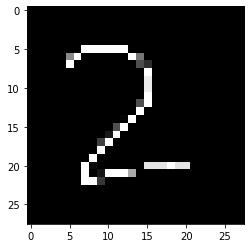

In [61]:
plt.imshow(preprocessed_digits[6], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[6]))

<function matplotlib.pyplot.show(close=None, block=None)>

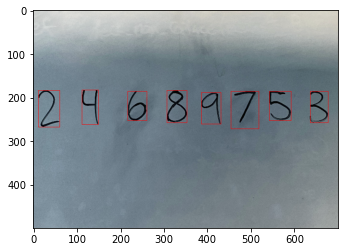

In [62]:
# Image taken on whiteboard

image = cv2.imread('number_test2.jpg')
image = cv2.resize(image, (700, 500))
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Check size of digit to attempt to keep extraneous markings out of data
    if(digit.size > 325):
        # Create rectangle around each digit in image to display
        cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
        # Resizing digit to 18x18 to be centered in 28x28 in image
        resized_digit = cv2.resize(digit, (18,18))
    
        # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
        # Appending final preprocessed digit to list
        preprocessed_digits.append(padded_digit)
    
plt.imshow(image, cmap='gray')
plt.show

In [63]:
len(preprocessed_digits)

8

In [64]:
shaped_digits = np.array(preprocessed_digits)
shaped_digits = shaped_digits.reshape(shaped_digits.shape[0], num_pixels).astype('float32')
shaped_digits /= 255
self_prediction = model.predict(shaped_digits)
self_prediction.argmax(axis=1)

array([9, 3, 5, 8, 6, 8, 2, 4])

Prediction: 9


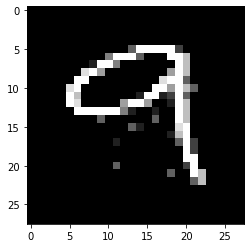

In [65]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[0]))

Prediction: 3


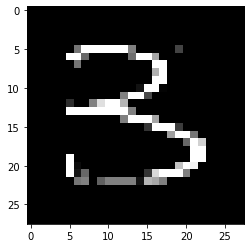

In [66]:
plt.imshow(preprocessed_digits[1], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[1]))

Prediction: 5


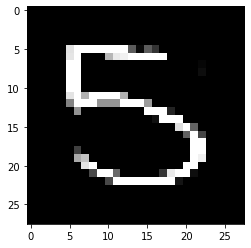

In [67]:
plt.imshow(preprocessed_digits[2], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[2]))

Prediction: 8


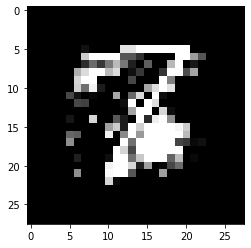

In [68]:
plt.imshow(preprocessed_digits[3], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[3]))

Prediction: 6


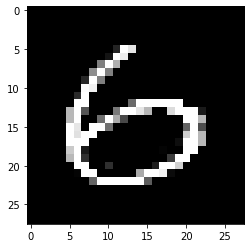

In [69]:
plt.imshow(preprocessed_digits[4], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[4]))

Prediction: 8


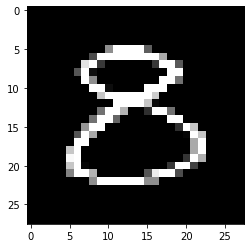

In [70]:
plt.imshow(preprocessed_digits[5], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[5]))

Prediction: 2


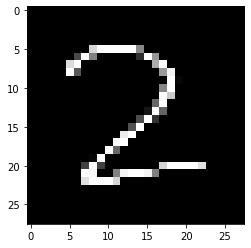

In [71]:
plt.imshow(preprocessed_digits[6], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[6]))

Prediction: 4


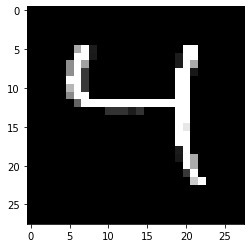

In [72]:
plt.imshow(preprocessed_digits[7], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[7]))

<function matplotlib.pyplot.show(close=None, block=None)>

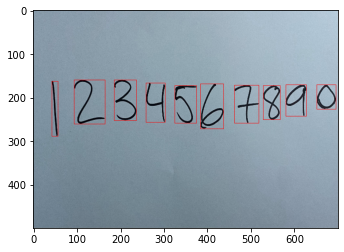

In [73]:
# Image with all digits

image = cv2.imread('number_test4.jpg')
image = cv2.resize(image, (700, 500))
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Check size of digit to attempt to keep extraneous markings out of data
    if(digit.size > 325):
        # Create rectangle around each digit in image to display
        cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
        # Resizing digit to 18x18 to be centered in 28x28 in image
        resized_digit = cv2.resize(digit, (18,18))
    
        # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
        # Appending final preprocessed digit to list
        preprocessed_digits.append(padded_digit)
    
plt.imshow(image, cmap='gray')
plt.show

In [74]:
len(preprocessed_digits)

10

In [75]:
shaped_digits = np.array(preprocessed_digits)
shaped_digits = shaped_digits.reshape(shaped_digits.shape[0], num_pixels).astype('float32')
shaped_digits /= 255
self_prediction = model.predict(shaped_digits)
self_prediction.argmax(axis=1)

array([8, 5, 7, 0, 9, 2, 4, 1, 3, 2])

Prediction: 8


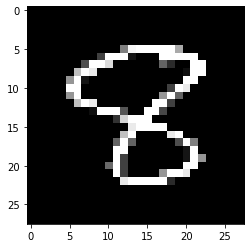

In [76]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[0]))

Prediction: 5


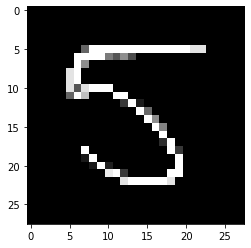

In [77]:
plt.imshow(preprocessed_digits[1], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[1]))

Prediction: 7


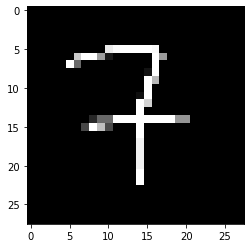

In [78]:
plt.imshow(preprocessed_digits[2], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[2]))

Prediction: 0


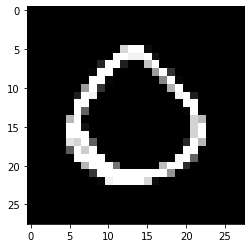

In [79]:
plt.imshow(preprocessed_digits[3], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[3]))

Prediction: 9


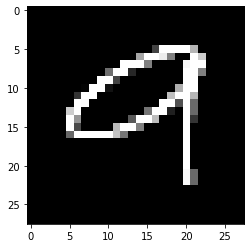

In [80]:
plt.imshow(preprocessed_digits[4], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[4]))

Prediction: 2


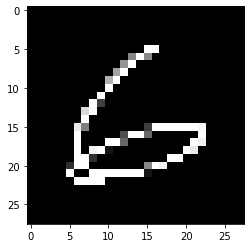

In [81]:
plt.imshow(preprocessed_digits[5], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[5]))

Prediction: 4


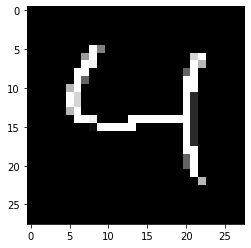

In [82]:
plt.imshow(preprocessed_digits[6], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[6]))

Prediction: 1


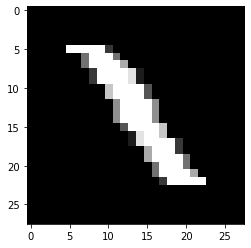

In [83]:
plt.imshow(preprocessed_digits[7], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[7]))

Prediction: 3


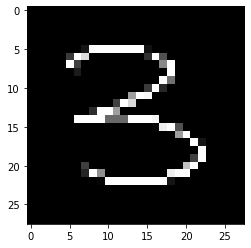

In [84]:
plt.imshow(preprocessed_digits[8], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[8]))

Prediction: 2


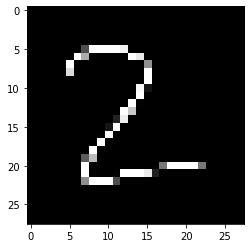

In [85]:
plt.imshow(preprocessed_digits[9], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[9]))